In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
DATA= pd.read_excel('BA Assignment Walmart Sales.xlsx')

In [3]:
DATA

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46:00,Ewallet,6.2
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16:00,Ewallet,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22:00,Cash,7.7
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33:00,Cash,4.1


In [5]:
DATA.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


In [6]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [8]:
# Convert 'Date' column to datetime
DATA['Date'] = pd.to_datetime(DATA['Date'], format='%d/%m/%Y')

# Convert 'Time' column to datetime
DATA['Time'] = pd.to_datetime(DATA['Time'], format='%H:%M:%S')

# Verify the changes
print(DATA.dtypes)

Invoice ID               object
Branch                   object
City                     object
Customer type            object
Gender                   object
Product line             object
Unit price              float64
Quantity                  int64
Date             datetime64[ns]
Time             datetime64[ns]
Payment                  object
Rating                  float64
dtype: object


In [9]:
DATA.shape

(1000, 12)

In [10]:
DATA.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Date', 'Time', 'Payment',
       'Rating'],
      dtype='object')

In [11]:
DATA.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [ ]:
# Performance of sales and revenue at the city and branch level 
# FOR THIS WE WILL
# Group the data by 'City' and 'Branch'.
# Calculate the total sales and revenue for each group.
# Analyze the results.

In [12]:
# Group the data by 'City' and 'Branch' and calculate total sales and revenue
city_branch_performance = DATA.groupby(['City', 'Branch']).agg({'Unit price': 'sum', 'Quantity': 'sum'})

# Rename columns for clarity
city_branch_performance.rename(columns={'Unit price': 'Total Revenue', 'Quantity': 'Total Sales'}, inplace=True)

# Calculate average unit price for each group
city_branch_performance['Average Unit Price'] = city_branch_performance['Total Revenue'] / city_branch_performance['Total Sales']

# Reset index to make 'City' and 'Branch' columns
city_branch_performance.reset_index(inplace=True)

# Display the results
print(city_branch_performance)

        City Branch  Total Revenue  Total Sales  Average Unit Price
0   Mandalay      A        6349.11          637            9.967206
1   Mandalay      B        6623.73          664            9.975497
2   Mandalay      C        5506.04          519           10.608940
3  Naypyitaw      A        5953.55          648            9.187577
4  Naypyitaw      B        6298.64          604           10.428212
5  Naypyitaw      C        6315.57          579           10.907720
6     Yangon      A        6342.88          598           10.606823
7     Yangon      B        6329.25          631           10.030507
8     Yangon      C        5953.36          630            9.449778


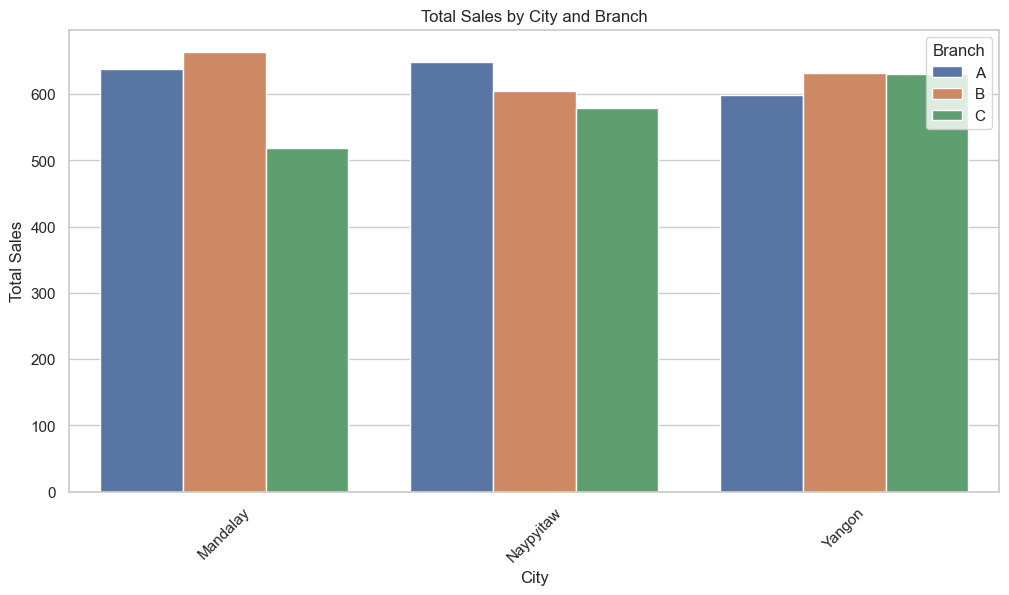

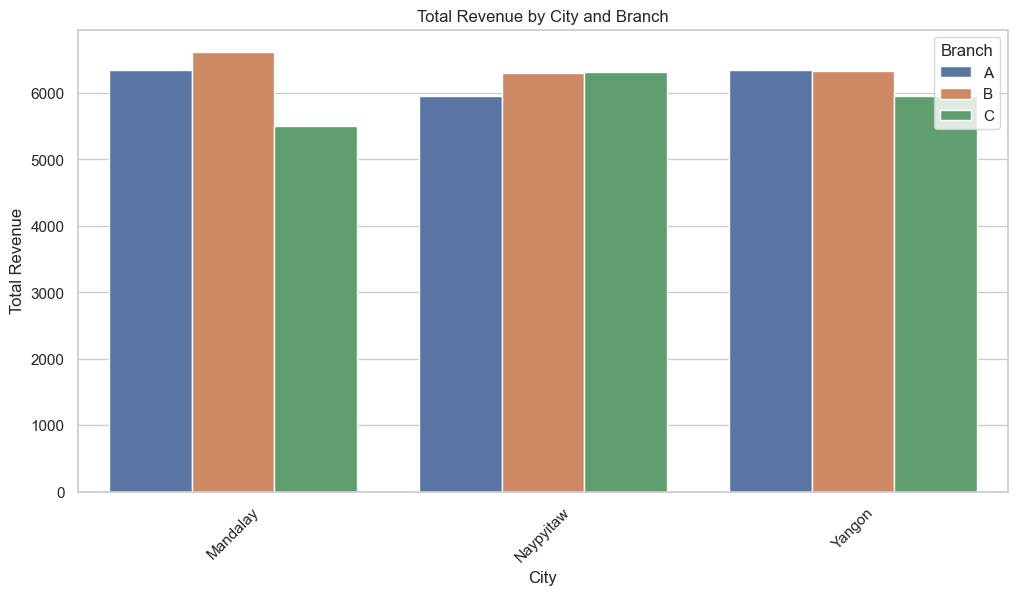

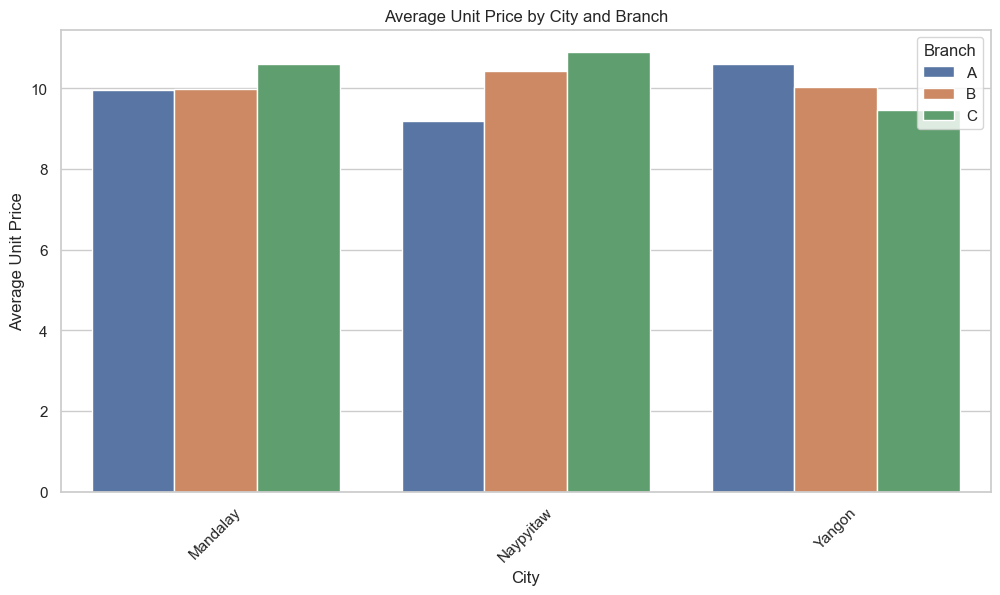

In [13]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot total sales by city and branch
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Total Sales', hue='Branch', data=city_branch_performance)
plt.title('Total Sales by City and Branch')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Plot total revenue by city and branch
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Total Revenue', hue='Branch', data=city_branch_performance)
plt.title('Total Revenue by City and Branch')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Plot average unit price by city and branch
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Average Unit Price', hue='Branch', data=city_branch_performance)
plt.title('Average Unit Price by City and Branch')
plt.xlabel('City')
plt.ylabel('Average Unit Price')
plt.xticks(rotation=45)
plt.show()

# average price of an item sold at each branch of the city
# we will
# Group the data by both 'City' and 'Branch'.
# Calculate the average unit price within each group.

In [14]:
# Group the data by 'City' and 'Branch' and calculate the average unit price
average_price_by_branch = DATA.groupby(['City', 'Branch'])['Unit price'].mean()

# Reset index to make 'City' and 'Branch' columns
average_price_by_branch = average_price_by_branch.reset_index()

# Display the result
print(average_price_by_branch)

        City Branch  Unit price
0   Mandalay      A   53.353866
1   Mandalay      B   56.133305
2   Mandalay      C   57.958316
3  Naypyitaw      A   54.123182
4  Naypyitaw      B   57.785688
5  Naypyitaw      C   57.941009
6     Yangon      A   55.639298
7     Yangon      B   56.011062
8     Yangon      C   52.684602


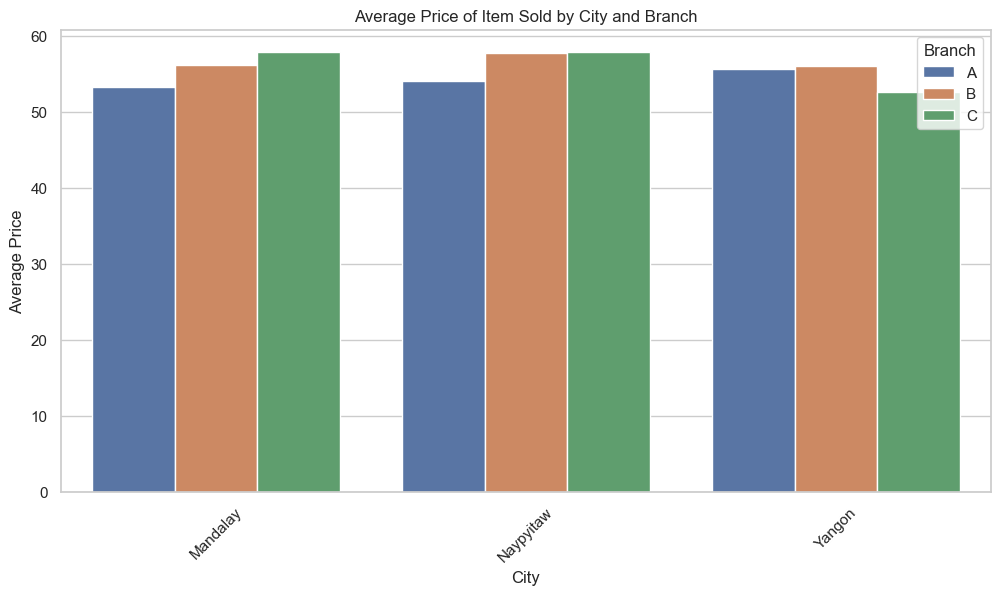

In [15]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot average price by city and branch
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Unit price', hue='Branch', data=average_price_by_branch)
plt.title('Average Price of Item Sold by City and Branch')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Analyzing the performance of sales and revenue month over month across different categories (Product line, Gender, and Payment Method) can provide valuable insights into identifying focus areas for improving sales
# for this
# Group the data by month, product line, gender, and payment method.
# Calculate total sales and revenue for each group.
# Analyze the results.

In [25]:
# Step 1: Prepare the data
DATA['Date'] = pd.to_datetime(DATA['Date'], format='%m/%d/%Y')
DATA['Month'] = DATA['Date'].dt.month

# Step 2: Group the data by month, product line, gender, and payment method
grouped_data = DATA.groupby(['Month', 'Product line', 'Gender', 'Payment']).agg({'Quantity': 'sum', 'Unit price': 'sum'})

# Step 3: Calculate total sales and revenue for each group
grouped_data['Revenue'] = grouped_data['Quantity'] * grouped_data['Unit price']

# Reset index to make 'Month' a column again
grouped_data.reset_index(inplace=True)

# Analyze the results
print(grouped_data.head())

   Month            Product line  Gender      Payment  Quantity  Unit price  \
0      1  Electronic accessories  Female         Cash        52      534.48   
1      1  Electronic accessories  Female  Credit card        54      371.20   
2      1  Electronic accessories  Female      Ewallet        43      251.77   
3      1  Electronic accessories    Male         Cash        62      552.72   
4      1  Electronic accessories    Male  Credit card        43      433.88   

    Revenue  
0  27792.96  
1  20044.80  
2  10826.11  
3  34268.64  
4  18656.84  


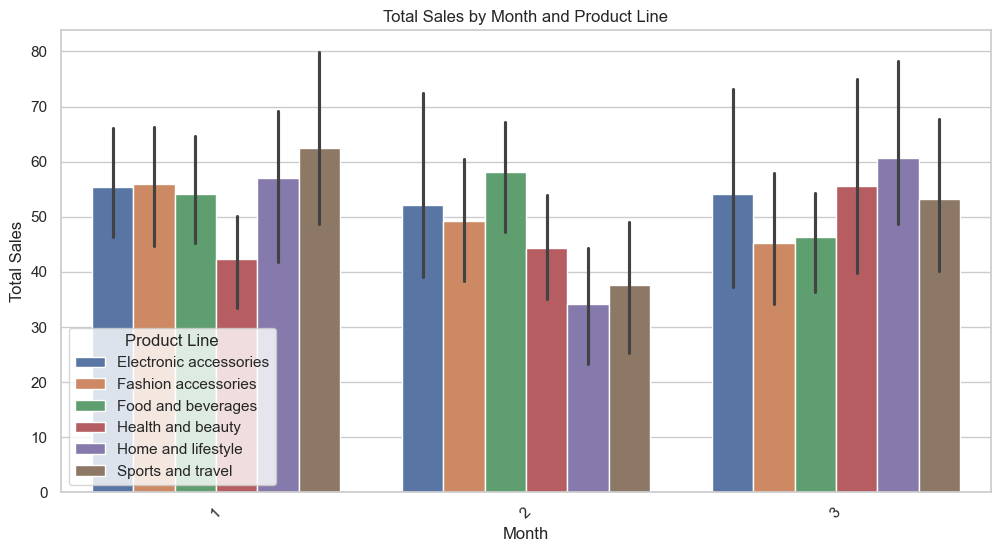

In [26]:
sns.set(style="whitegrid")

# Plot total sales by month and product line
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Quantity', hue='Product line', data=grouped_data)
plt.title('Total Sales by Month and Product Line')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Product Line')
plt.show()

In [28]:
# Focus areas for improving sales in April 2019: are Home and lifestyle, Health and Beauty, Sports and travel